### Problem Statement 21:
Build the linear regression model using scikit learn in boston data to predict 'Price'
based on other dependent variable.

#### Boston housing data
**Data description**
The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

crim-
per capita crime rate by town.

zn-
proportion of residential land zoned for lots over 25,000 sq.ft.

indus-
proportion of non-retail business acres per town.

chas-
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox-
nitrogen oxides concentration (parts per 10 million).

rm-
average number of rooms per dwelling.

age-
proportion of owner-occupied units built prior to 1940.

dis-
weighted mean of distances to five Boston employment centres.

rad-
index of accessibility to radial highways.

tax-
full-value property-tax rate per $10,000.

ptratio-
pupil-teacher ratio by town.

black-
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat-
lower status of the population (percent).

medv-
median value of owner-occupied homes in $1000s.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
# Load data
boston = load_boston()
bos = pd.DataFrame(boston.data)

bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (8,4)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
print('column names:{}\n target var: {}'.format(boston.feature_names,boston.target[:10]))

column names:['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
 target var: [ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9]


In [4]:
# Load data
boston = load_boston()
bos = pd.DataFrame(boston.data, columns= boston.feature_names)

bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
bos['Price'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
print(bos.shape)

(506, 14)


In [7]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Univariate analysis

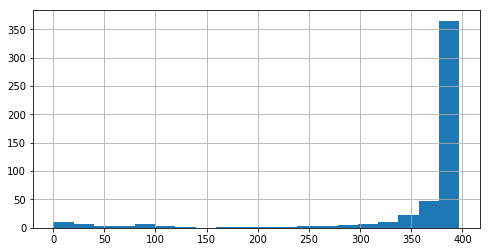

In [8]:
bos.B.hist(bins=20)

The Price is skewed by: 1.10809840825


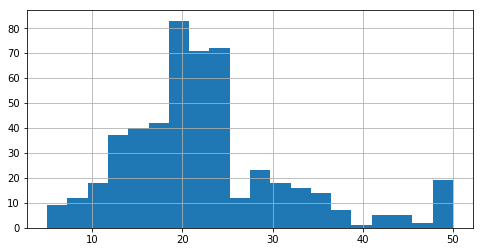

In [20]:
print('The Price is skewed by:',bos.Price.skew())
bos.Price.hist(bins=20)

#### Multivariate analysis

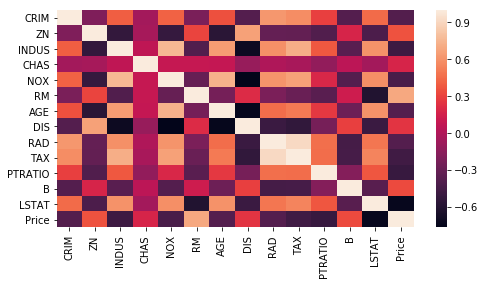

In [11]:
corr = bos.corr()
sns.heatmap(corr)

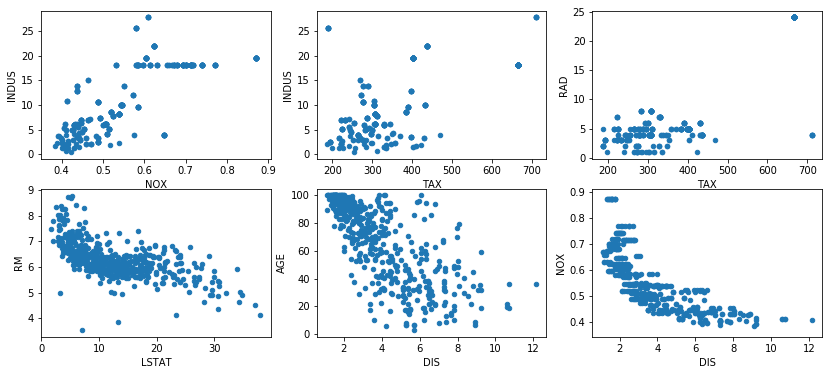

In [19]:
# The correlated vars are NOX - INDUS, TAX-INDUS, TAX-RAD
fig, axs = plt.subplots(2,3, figsize=(14,6))
bos.plot(kind = 'scatter', x='NOX',y='INDUS',ax=axs[0][0])
bos.plot(kind='scatter',x='TAX',y='INDUS',ax=axs[0][1])
bos.plot(kind='scatter',x= 'TAX',y='RAD',ax=axs[0][2])
bos.plot(kind='scatter',x='LSTAT',y='RM',ax=axs[1][0])
bos.plot(kind='scatter',x='DIS',y='AGE',ax=axs[1][1])
bos.plot(kind='scatter',x='DIS',y='NOX',ax=axs[1][2])

From the above graphs we see INDUS-NOX, INDUS-TAX, RAD-TAX are positively correlated &
                             RM-LSTAT, AGE-DIS, NOX-DIS are negetively correlated

#### Feature selection

In [29]:
# Check variable significance
import statsmodels.formula.api as smf
lm = smf.ols(formula='Price~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=bos).fit()
lm.conf_int()

,0,1
Intercept,26.461795,46.520411
CRIM,-0.171443,-0.042898
ZN,0.019422,0.073368
INDUS,-0.099968,0.141689
CHAS,0.995659,4.381463
NOX,-25.302434,-10.289083
RM,2.983470,4.626035
AGE,-0.025205,0.026707
DIS,-1.867703,-1.083814
RAD,0.175323,0.435987


In [30]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 15 Jun 2018   Prob (F-statistic):          6.95e-135
Time:                        12:27:19   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We got** R-Squared value - 0.741 \
       Adj.R-Squared value - 0.734**

**From the above table AGE & INDUS are not significant vars - lets remove those vars**

### Model building
#### Build a base model considering all the variables

In [33]:
feature_cols = ['CRIM','ZN','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X = bos[feature_cols]
y = bos.Price

# Devide the data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_val, y_train,y_val = train_test_split(X,y,test_size=0.3)

In [35]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

lreg.fit(X,y)

pred = lreg.predict(X)

mse = np.mean((pred - y)**2)
print(mse)
lreg.score(X,y)

21.903046222918714


0.74054535204614425

In [89]:
lreg.fit(x_train,y_train)
pred = lreg.predict(x_val)

mse = np.sqrt(np.mean((pred - y_val)**2))
print('The Root mean squared error is: {}'.format(mse))
print('-'*60)
rsq = lreg.score(x_val,y_val)
print('The rsquared value is: {}'.format(rsq))

The Root mean squared error is: 4.558543041916675
------------------------------------------------------------
The rsquared value is: 0.7213953183774537


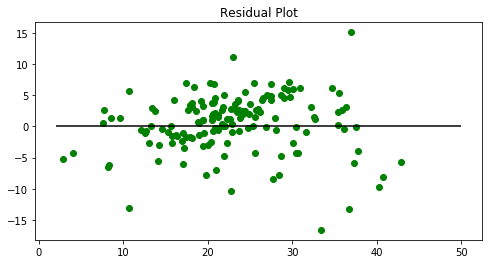

In [47]:
plt.scatter(pred, (pred - y_val),c='g')
plt.hlines(y=0,xmin=2, xmax=50)
plt.title('Residual Plot')
plt.show()

As there is no constant variance in error terms we see no heteroscadasticity

**Try variance inflation(VIF) test for multicollinerity **

#### Feature importnace

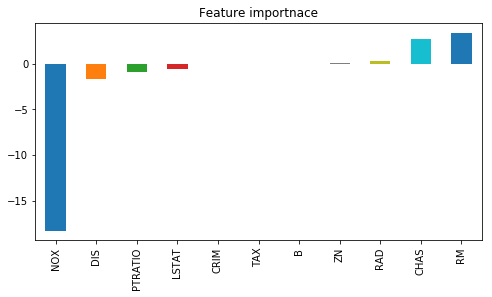

In [53]:
predictors = X.columns
coeff = pd.Series(lreg.coef_, predictors).sort_values()
coeff.plot(kind='bar',title='Feature importnace')

Out of all the variables only 8 variables seems to be most significant

['ZN','CHAS','NOX','RM','DIS','RAD','PTRATIO','LSTAT']

### Ridge regression

In [88]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.05, normalize=True)

ridge_model.fit(x_train, y_train)

pred = ridge_model.predict(x_val)
mse = np.sqrt(np.mean((pred - y_val)**2))
print('The Root mean squared error is: {}'.format(mse))
print('-'*60)
rsq = ridge_model.score(x_val,y_val)
print('The rsquared value is: {}'.format(rsq))

The Root mean squared error is: 4.504726398254212
------------------------------------------------------------
The rsquared value is: 0.7279347166859791


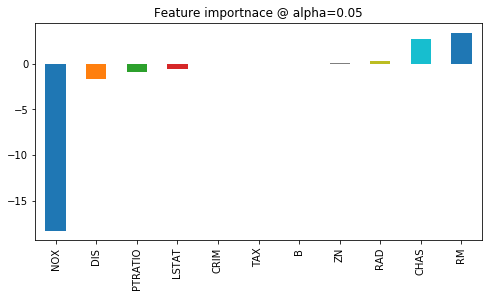

In [58]:
predictors = X.columns
coeff = pd.Series(lreg.coef_, predictors).sort_values()
coeff.plot(kind='bar',title='Feature importnace @ alpha=0.05')

In [90]:
ridge_model = Ridge(alpha=0.5, normalize=True)

ridge_model.fit(x_train, y_train)

pred = ridge_model.predict(x_val)
mse = np.sqrt(np.mean((pred - y_val)**2))
print('The Root mean squared error is: {}'.format(mse))
print('-'*60)
rsq = ridge_model.score(x_val,y_val)
print('The rsquared value is: {}'.format(rsq))

The Root mean squared error is: 4.795907829993362
------------------------------------------------------------
The rsquared value is: 0.6916258634563215


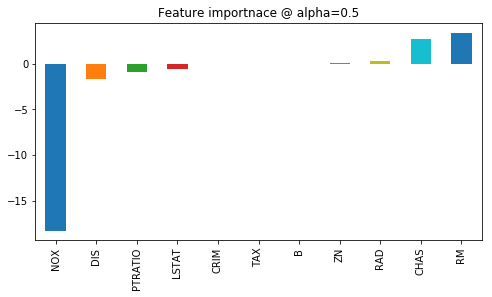

In [60]:
predictors = X.columns
coeff = pd.Series(lreg.coef_, predictors).sort_values()
coeff.plot(kind='bar',title='Feature importnace @ alpha=0.5')

### Lasso regression

In [91]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01, normalize=True)

lasso_model.fit(x_train,y_train)

pred = lasso_model.predict(x_val)

mse = np.sqrt(np.mean((pred - y_val)**2))
print('The Root mean squared error is: {}'.format(mse))
print('-'*60)
rsq = lasso_model.score(x_val,y_val)
print('The rsquared value is: {}'.format(rsq))

The Root mean squared error is: 4.619979161465457
------------------------------------------------------------
The rsquared value is: 0.7138351262905407


In [92]:
lasso_model = Lasso(alpha=0.3, normalize=True)

lasso_model.fit(x_train,y_train)

pred = lasso_model.predict(x_val)

mse = np.sqrt(np.mean((pred - y_val)**2))
print('The Root mean squared error is: {}'.format(mse))
print('-'*60)
rsq = lasso_model.score(x_val,y_val)
print('The rsquared value is: {}'.format(rsq))

The Root mean squared error is: 7.802131563868184
------------------------------------------------------------
The rsquared value is: 0.18386344757186515


**The Lasso model with alpha = 0.01 seems to be most relevant with high rsquared value**

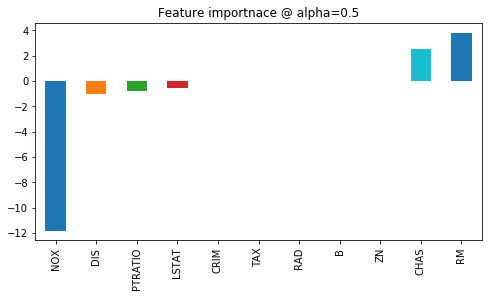

In [68]:
predictors = X.columns
coeff = pd.Series(lasso_model.coef_, predictors).sort_values()
coeff.plot(kind='bar',title='Feature importnace @ alpha=0.5')

Notice that Lasso has removed 'ZN' and 'RAD'

### Elasticnet regression

In [100]:
from sklearn.linear_model import ElasticNet
Enet_model = ElasticNet(alpha=0.01, l1_ratio = 0.5,normalize=False)

Enet_model.fit(x_train,y_train)

pred = Enet_model.predict(x_val)

mse = np.sqrt(np.mean((pred - y_val)**2))
print('The Root mean squared error is: {}'.format(mse))
print('-'*60)
rsq = Enet_model.score(x_val,y_val)
print('The rsquared value is: {}'.format(rsq))

The Root mean squared error is: 4.601603308751449
------------------------------------------------------------
The rsquared value is: 0.716107026471968


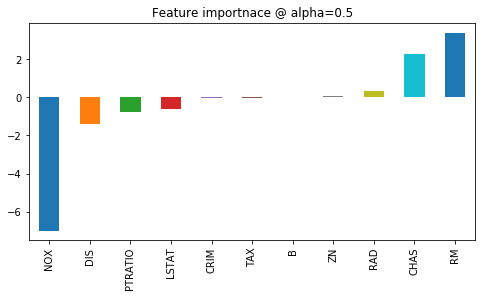

In [83]:
predictors = X.columns
coeff = pd.Series(Enet_model.coef_, predictors).sort_values()
coeff.plot(kind='bar',title='Feature importnace @ alpha=0.5')

## Conclusion:
out of all the above models **Ridge model** has given us highest rsquared(0.7279) value and minimum RMSE(10.14) @ alpha = 0.05